In [668]:
# Machine Learning classification
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# To scale the data
from sklearn.preprocessing import MinMaxScaler

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [669]:
# Read in data for "bitcoin_price" dataset
bitcoin_price = pd.read_csv('bitcoin_price.csv',parse_dates=['Date'])

# Sort the dates into proper order
bitcoin_price = bitcoin_price[::-1]

# Reset index for bitcoin_price
bitcoin_price.index = range(len(bitcoin_price))

bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [670]:
# Read in data for "bitcoin_price" dataset
bitcoin_dataset = pd.read_csv('bitcoin_dataset.csv',parse_dates=['Date'])
bitcoin_dataset.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-11-10,0.0,1339450.0,0.0,0.0,0.0,0.000215,0,1.0,0.0,...,0.000000,0.0,71,71,26958,71,71,3550.0,0.0,0.0
1,2009-11-11,0.0,1342900.0,0.0,0.0,0.0,0.000323,0,1.0,0.0,...,19.166667,0.0,71,78,27036,78,78,93450.0,18000.0,0.0
2,2009-11-12,0.0,1346400.0,0.0,0.0,0.0,0.000215,0,1.0,0.0,...,0.000000,0.0,70,70,27106,70,70,3500.0,0.0,0.0
3,2009-11-13,0.0,1349900.0,0.0,0.0,0.0,0.000242,0,1.0,0.0,...,673.076923,0.0,73,73,27179,73,73,4100.0,520.0,0.0
4,2009-11-14,0.0,1354050.0,0.0,0.0,0.0,0.000216,0,1.0,0.0,...,0.000000,0.0,83,83,27262,83,83,4150.0,0.0,0.0


In [671]:
# Make bitcoin_price and bitcoin_dataset the same length
equal_length = len(bitcoin_dataset) - len(bitcoin_price)
bitcoin_dataset = bitcoin_dataset[['btc_estimated_transaction_volume_usd','btc_total_bitcoins','btc_avg_block_size']][equal_length:]

# Reset index for bitcoin_dataset
bitcoin_dataset.index = range(len(bitcoin_dataset))

# Unable to change bitcoin_price 'Volume' and 'Market Cap' from type string to float64, so will drop columns
bitcoin_price = bitcoin_price[['Date','Close','Open']]

# Merge bitcoin_price and bitcoin_dataset
df = pd.merge(bitcoin_price,bitcoin_dataset, left_index = True, right_index = True)
df.head()

,Date,Close,Open,btc_estimated_transaction_volume_usd,btc_total_bitcoins,btc_avg_block_size
0,2013-04-28,134.21,135.30,22605050.0,11090225.0,0.126539
1,2013-04-29,144.54,134.44,41199388.0,11094750.0,0.140126
2,2013-04-30,139.00,144.00,32294820.0,11098475.0,0.185539
3,2013-05-01,116.99,139.00,32988744.0,11102000.0,0.167730
4,2013-05-02,105.21,116.38,33019004.0,11105600.0,0.189949


Text(0,0.5,'Price in USD')

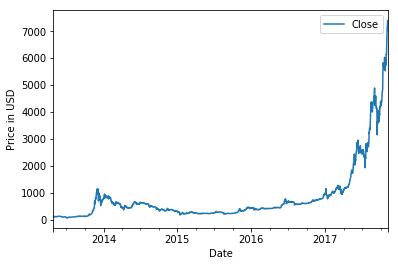

In [672]:
# Plot bitcoin's closing price - expected output
df_close = df[['Date','Close']]
df_close = df_close.set_index('Date')

bitcoin_plot = df_close.plot()
bitcoin_plot.set_xlabel('Date')
bitcoin_plot.set_ylabel('Price in USD')

In [673]:
# Remove 'Date' column from df
df = df.drop('Date', 1)

# Define array size
m = df.shape[0]
n = df.shape[1]

# Convert df to an array
df = df.values

# Training and test data
train_start = 0
train_end = int(np.floor(0.8*m))
test_start = train_end + 1
test_end = m
data_train = df[np.arange(train_start, train_end), :]
data_test = df[np.arange(test_start, test_end), :]

In [674]:
# Prepare data for Machine Learning by scaling
scaler = MinMaxScaler()

# Build X and y train/test sets
X_train = scaler.fit_transform(data_train[:, 1:])
y_train = scaler.fit_transform(data_train[:, 0].reshape(-1,1))
X_test = scaler.fit_transform(data_test[:, 1:])
y_test = scaler.fit_transform(data_test[:, 0].reshape(-1,1))

# Build X and y
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)


In [675]:
# Implement machine learning algorithm MLPRegressor
clf = MLPRegressor(activation='identity',solver='lbfgs')
clf.fit(X,y)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('MSE testing', mean_squared_error(train_pred,y_train))
print(shape(test_pred))

MSE testing 0.000434392275132
(330,)


Text(0.5,1,'Testing Result Scaled')

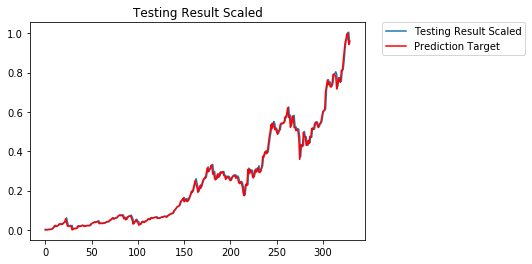

In [676]:
# Comparison of the expected and tested outputs scaled
plt.plot(test_pred,label='Testing Result Scaled')
plt.plot(y_test,color='red',label='Prediction Target')
plt.legend('test,prediction', ncol=2, loc='upper left');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Testing Result Scaled')

Text(0.5,1,'Testing Result in USD')

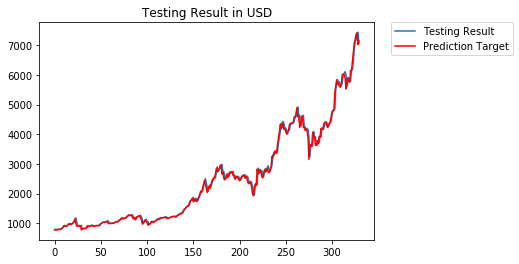

In [677]:
# Comparison plot between expected output and test output
plt.plot(scaler.inverse_transform(test_pred.reshape(-1,1)),label='Testing Result')
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),color='red', label='Prediction Target')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Testing Result in USD')